In [29]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
%matplotlib inline
from scipy.stats import norm
from sklearn import preprocessing

In [30]:
#read the Sales CSV file
churndf = pd.read_csv("churndata.csv")

In [31]:
churndf.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [32]:
# Let's see if they are many missing values we have
churndf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
#Making a list of missing value types because the above list does not show us a clear value

missing_values = ["n/a", "na", "-", " "]
df = pd.read_csv("churndata.csv", na_values = missing_values)
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

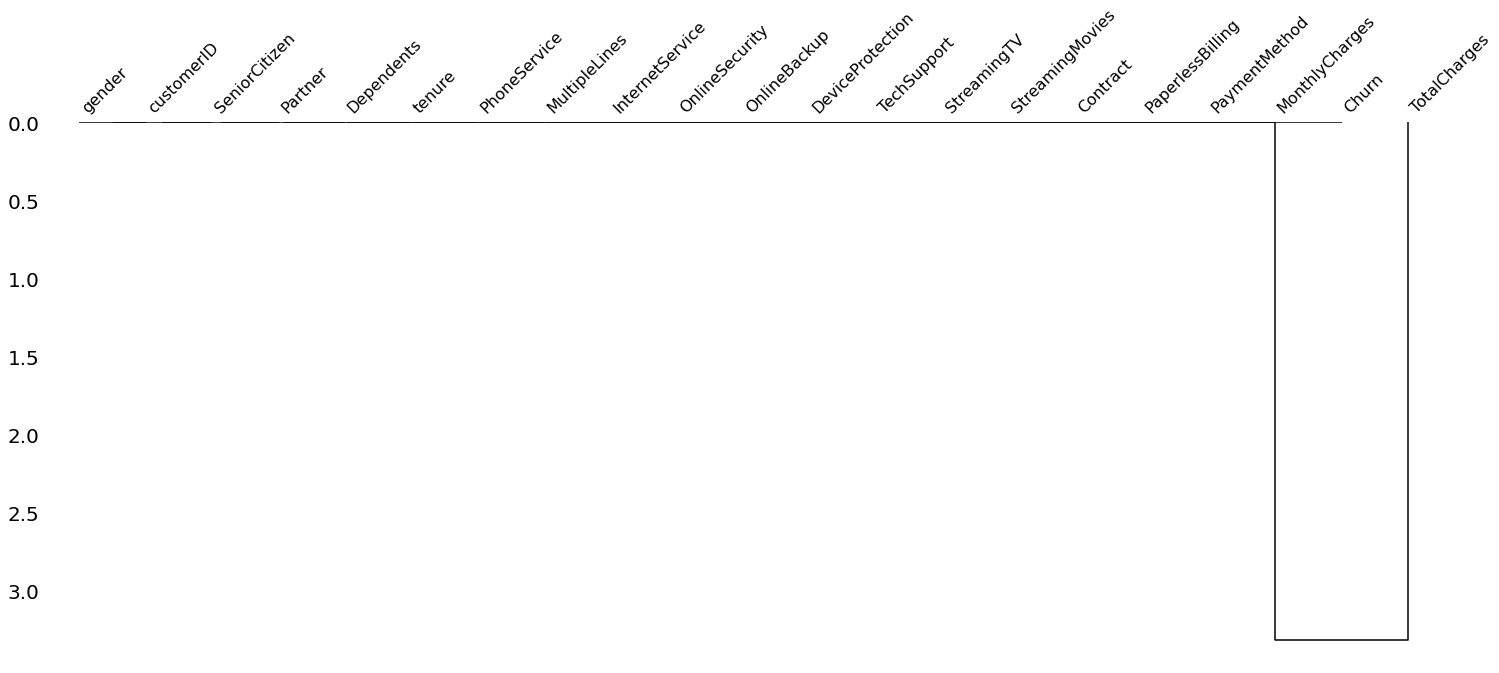

In [42]:
mano.dendrogram(df)

In [34]:
#Dropping values of total charges that are null since its less than 1%
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [35]:
print ("\nUnique values :  \n",churndf.nunique())


Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [36]:
#To check whether they are any duplicated values in customer_id
bool_custid = not churndf["customerID"].is_unique      # True 
bool_custid = churndf['customerID'].duplicated().any() # True



In [37]:
#We see a lot of values which contain 3 unique values in columns like which contain Yes, No and no internet service
#OnlineSecurity         3
#OnlineBackup           3
#DeviceProtection       3
#TechSupport            3
#StreamingTV            3
#StreamingMovies        3 

#Hence for BI analysis NO and no internet service can be categorized as the same

In [38]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [50]:
#Convert Senior citizen into objects that will allow us a better comparison
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})



In [54]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Statistical Testing

In [55]:
# Importing the statistics module 
import pandas as pd
from scipy import stats
from statistics import mode 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [52]:
df.dtypes


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#Since we already from our data manipulation that all six columns below is directly connected to internet service 

#OnlineSecurity         
#OnlineBackup           
#DeviceProtection       
#TechSupport            
#StreamingTV            
#StreamingMovies         

## Chi Squared Method

The reason that we have used Chi Squared Method for testing because most of our data is in object form and this method allows to statistically analyze the dependencies

In [57]:
data_crosstab = pd.crosstab(df['OnlineSecurity'],df['InternetService'], 
margins = False) 
print(data_crosstab)


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

InternetService       DSL  Fiber optic    No
OnlineSecurity                              
No                   1241         2257     0
No internet service     0            0  1526
Yes                  1180          839     0
dof=4
[[1202.42197927 1537.66974301  757.90827772]
 [ 524.55572909  670.80732642  330.63694448]
 [ 694.02229164  887.52293057  437.45477779]]
significance=0.050, p=0.000
Dependent (reject H0)


In [58]:
data_crosstab = pd.crosstab(df['DeviceProtection'],df['InternetService'], 
margins = False) 
print(data_crosstab)


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

InternetService       DSL  Fiber optic    No
DeviceProtection                            
No                   1356         1739     0
No internet service     0            0  1526
Yes                  1065         1357     0
dof=4
[[1063.89251739 1360.51682522  670.59065739]
 [ 524.55572909  670.80732642  330.63694448]
 [ 832.55175351 1064.67584836  524.77239813]]
significance=0.050, p=0.000
Dependent (reject H0)


In [59]:
data_crosstab = pd.crosstab(df['StreamingTV'],df['InternetService'], 
margins = False) 
print(data_crosstab)


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

InternetService       DSL  Fiber optic    No
StreamingTV                                 
No                   1464         1346     0
No internet service     0            0  1526
Yes                   957         1750     0
dof=4
[[ 965.92503195 1235.23498509  608.83998296]
 [ 524.55572909  670.80732642  330.63694448]
 [ 930.51923896 1189.95768849  586.52307255]]
significance=0.050, p=0.000
Dependent (reject H0)


Our preliminary testing confirms our assumption that all online services our directly relate to the internet service

Now lets check that do other services depend on each other or not

In [60]:
data_crosstab = pd.crosstab(df['StreamingTV'],df['DeviceProtection'], 
margins = False) 
print(data_crosstab)


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

DeviceProtection       No  No internet service   Yes
StreamingTV                                         
No                   1955                    0   855
No internet service     0                 1526     0
Yes                  1140                    0  1567
dof=4
[[1234.83600738  608.83998296  966.32400965]
 [ 670.59065739  330.63694448  524.77239813]
 [1189.57333523  586.52307255  930.90359222]]
significance=0.050, p=0.000
Dependent (reject H0)


In [61]:
data_crosstab = pd.crosstab(df['TechSupport'],df['DeviceProtection'], 
margins = False) 
print(data_crosstab)


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

DeviceProtection       No  No internet service   Yes
TechSupport                                         
No                   2260                    0  1213
No internet service     0                 1526     0
Yes                   835                    0  1209
dof=4
[[1526.18699418  752.4915519  1194.32145393]
 [ 670.59065739  330.63694448  524.77239813]
 [ 898.22234843  442.87150362  702.90614795]]
significance=0.050, p=0.000
Dependent (reject H0)


In [62]:
data_crosstab = pd.crosstab(df['TechSupport'],df['OnlineBackup'], 
margins = False) 
print(data_crosstab)


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

OnlineBackup           No  No internet service   Yes
TechSupport                                         
No                   2196                    0  1277
No internet service     0                 1526     0
Yes                   892                    0  1152
dof=4
[[1522.73519807  752.4915519  1197.77325004]
 [ 669.07397416  330.63694448  526.28908136]
 [ 896.19082777  442.87150362  704.93766861]]
significance=0.050, p=0.000
Dependent (reject H0)
